In [126]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt
import pandas as pd
from matplotlib import style
from sklearn.linear_model import LinearRegression

In [187]:
ticker = 'CCJ'
api_key = "ec2d6f3b0cc9395fbce02f1316669229"
years = 10


url = (f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{ticker}?limit={years}&apikey={api_key}")

r = requests.get(url)
balance_sheet = r.json()


In [188]:
url1 = (f"https://financialmodelingprep.com/api/v4/shares_float/{ticker}&apikey={api_key}")
f = requests.get(url1)

shares_float = f.json()


In [189]:
df_balance_sheet = pd.DataFrame(balance_sheet)

In [190]:
df_balance_sheet.head()

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,cashAndCashEquivalents,shortTermInvestments,...,totalStockholdersEquity,totalEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt,link,finalLink
0,2023-12-31,CCJ,CAD,0001009001,2023-12-31,2023-12-29 19:00:00,2023,FY,566809000,0,...,6094305000,6094309000,9934057000,4000,9934057000,3192515000,1792690000,1225881000,None,None
1,2022-12-31,CCJ,CAD,0001009001,2022-12-31,2022-12-30 19:00:00,2022,FY,904674000,1138174000,...,5836054000,5836065000,8632793000,11000,8632793000,1349146000,997000000,92326000,,
2,2021-12-31,CCJ,CAD,0001009001,2021-12-31,2021-12-31 00:00:00,2021,FY,1014190000,84906000,...,4845841000,4845968000,7517744000,127000,7517744000,318146000,996250000,-17940000,None,None
3,2020-12-31,CCJ,CAD,0001009001,2020-12-31,2020-12-31 00:00:00,2020,FY,728242000,24985000,...,4958355000,4958561000,7580831000,206000,7580831000,244673000,995541000,267299000,None,None
4,2019-12-31,CCJ,CAD,0001009001,2019-12-31,2019-12-31 00:00:00,2019,FY,866702000,0,...,4994725000,4994963000,7427248000,238000,7427248000,252681000,996718000,130016000,None,None


In [191]:
df_balance_sheet.describe()

,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,accumulatedOtherComprehensiveIncomeLoss,othertotalStockholdersEquity,totalStockholdersEquity,totalEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt
count,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.0,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
mean,8.161234e+08,2.496130e+08,1.065736e+09,3.029958e+08,6.391600e+08,2.035278e+08,2.211420e+09,3.582218e+09,0.0,5.163460e+07,...,5.586420e+07,2.284888e+08,5.345856e+09,5.345973e+09,8.218535e+09,117200.000000,8.218535e+09,1.071432e+09,1.155640e+09,3.395164e+08
std,1.728515e+08,4.979307e+08,5.792377e+08,8.387940e+07,1.773497e+08,3.286130e+07,6.341417e+08,1.676539e+08,0.0,6.708685e+06,...,4.899090e+07,8.630670e+06,5.753119e+08,5.752169e+08,1.076863e+09,108012.499277,1.076863e+09,1.274504e+09,3.561223e+08,5.058721e+08
min,5.668090e+08,0.000000e+00,5.668090e+08,2.171800e+08,4.062720e+08,1.595130e+08,1.806978e+09,3.368772e+09,0.0,4.357700e+07,...,-1.528200e+07,2.156790e+08,4.845841e+09,4.845968e+09,7.427248e+09,4000.000000,7.427248e+09,2.446730e+08,9.955410e+08,-1.794000e+07
25%,7.282420e+08,0.000000e+00,7.532270e+08,2.318800e+08,5.048620e+08,1.901400e+08,1.841890e+09,3.473490e+09,0.0,4.711700e+07,...,3.465200e+07,2.246870e+08,4.958355e+09,4.958561e+09,7.517744e+09,11000.000000,7.517744e+09,2.526810e+08,9.962500e+08,9.232600e+07
50%,8.667020e+08,2.498500e+07,8.667020e+08,3.043370e+08,6.922610e+08,1.957290e+08,1.945044e+09,3.576599e+09,0.0,5.124700e+07,...,7.169900e+07,2.300390e+08,4.994725e+09,4.994963e+09,7.580831e+09,127000.000000,7.580831e+09,3.181460e+08,9.967180e+08,1.300160e+08
75%,9.046740e+08,8.490600e+07,1.099096e+09,3.382750e+08,7.697970e+08,2.332570e+08,2.141552e+09,3.720672e+09,0.0,5.582200e+07,...,7.279500e+07,2.346810e+08,5.836054e+09,5.836065e+09,8.632793e+09,206000.000000,8.632793e+09,1.349146e+09,9.970000e+08,2.672990e+08
max,1.014190e+09,1.138174e+09,2.042848e+09,4.233070e+08,8.226080e+08,2.390000e+08,3.321636e+09,3.771557e+09,0.0,6.041000e+07,...,1.154570e+08,2.373580e+08,6.094305e+09,6.094309e+09,9.934057e+09,238000.000000,9.934057e+09,3.192515e+09,1.792690e+09,1.225881e+09


In [192]:
#change in debt 
for index, row in df_balance_sheet.iterrows():
    total_debt = row['totalDebt']
    date = row['date']
    print(date, total_debt)    

print()    
PC2019_2020 = (df_balance_sheet['totalDebt'][3] - df_balance_sheet['totalDebt'][4])/df_balance_sheet['totalDebt'][3] * 100
print(f'Debt Change Percentage from 2019-2020:{PC2019_2020:.2f}%')

PC2020_2021 = (df_balance_sheet['totalDebt'][2] - df_balance_sheet['totalDebt'][3])/df_balance_sheet['totalDebt'][2]*100
print(f'Debt Change Percentage from 2020-2021:{PC2020_2021:.2f}%')

PC2021_2022 =  (df_balance_sheet['totalDebt'][1] - df_balance_sheet['totalDebt'][2])/df_balance_sheet['totalDebt'][1]*100
print(f'Debt Change Percentage from 2021-2022:{PC2021_2022:.2f}%')

PC2022_2023 =  (df_balance_sheet['totalDebt'][0] - df_balance_sheet['totalDebt'][1])/df_balance_sheet['totalDebt'][0]*100
print(f'Debt Change Percentage from 2022-2023:{PC2022_2023:.2f}%')

    
    

2023-12-31 1792690000
2022-12-31 997000000
2021-12-31 996250000
2020-12-31 995541000
2019-12-31 996718000

Debt Change Percentage from 2019-2020:-0.12%
Debt Change Percentage from 2020-2021:0.07%
Debt Change Percentage from 2021-2022:0.08%
Debt Change Percentage from 2022-2023:44.39%


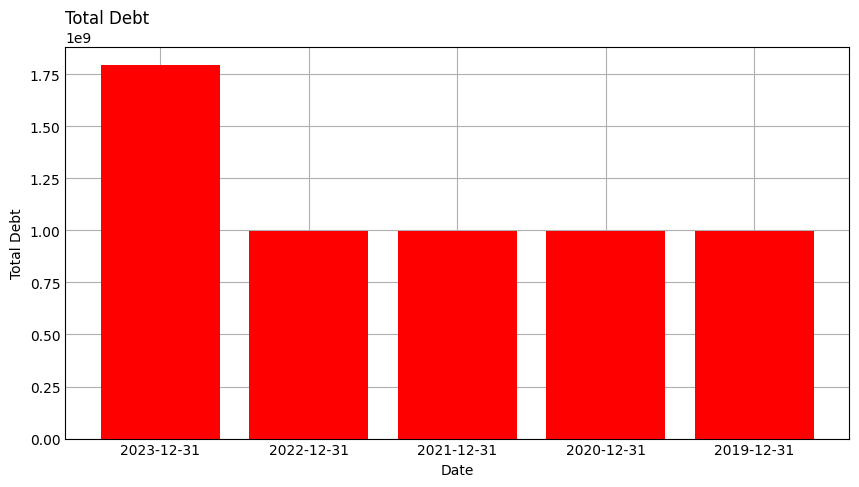

In [193]:
plt.figure(figsize=(8,4))
x = df_balance_sheet['date']
y = df_balance_sheet['totalDebt']

plt.xlabel('Date')
plt.ylabel('Total Debt')
plt.title('Total Debt', loc='left')

plt.bar(x,y, color='red')
plt.show()

## Debt ratio
Debt Ratios
- Amount of debt a company has in relation to it's assets
- The Debt to Ratio tells us the degree of leverage used by the company


In [194]:
for index, row in df_balance_sheet.iterrows():
    total_assets = row['totalAssets']
    total_debt = row['totalDebt']
    print()
    debt_ratio = total_debt / total_assets
    if debt_ratio <= 0.4:
        print(f'The Company has more assets than debt {debt_ratio:.2f}')
    else:
        print(f'The Company has more debt than Asset {debt_ratio:.2f}')
    print(f'Total Assets:{total_assets}, Total debt:{total_debt}')



The Company has more assets than debt 0.18
Total Assets:9934057000, Total debt:1792690000

The Company has more assets than debt 0.12
Total Assets:8632793000, Total debt:997000000

The Company has more assets than debt 0.13
Total Assets:7517744000, Total debt:996250000

The Company has more assets than debt 0.13
Total Assets:7580831000, Total debt:995541000

The Company has more assets than debt 0.13
Total Assets:7427248000, Total debt:996718000


In [195]:
#Change in assets
for index, row in df_balance_sheet.iterrows():
    total_debt = row['totalAssets']
    date = row['date']
    print(date, total_debt)    

print()    
PC2019_2020 = (df_balance_sheet['totalAssets'][3] - df_balance_sheet['totalAssets'][4])/df_balance_sheet['totalAssets'][3] * 100
print(f'Assets Change Percentage from 2019-2020:{PC2019_2020:.2f}%')

PC2020_2021 = (df_balance_sheet['totalAssets'][2] - df_balance_sheet['totalAssets'][3])/df_balance_sheet['totalAssets'][2]*100
print(f'Assets Change Percentage from 2020-2021:{PC2020_2021:.2f}%')

PC2021_2022 =  (df_balance_sheet['totalAssets'][1] - df_balance_sheet['totalAssets'][2])/df_balance_sheet['totalAssets'][1]*100
print(f'Assets Change Percentage from 2021-2022:{PC2021_2022:.2f}%')

PC2022_2023 =  (df_balance_sheet['totalAssets'][0] - df_balance_sheet['totalAssets'][1])/df_balance_sheet['totalAssets'][0]*100
print(f'Assets Change Percentage from 2022-2023:{PC2022_2023:.2f}%')


2023-12-31 9934057000
2022-12-31 8632793000
2021-12-31 7517744000
2020-12-31 7580831000
2019-12-31 7427248000

Assets Change Percentage from 2019-2020:2.03%
Assets Change Percentage from 2020-2021:-0.84%
Assets Change Percentage from 2021-2022:12.92%
Assets Change Percentage from 2022-2023:13.10%


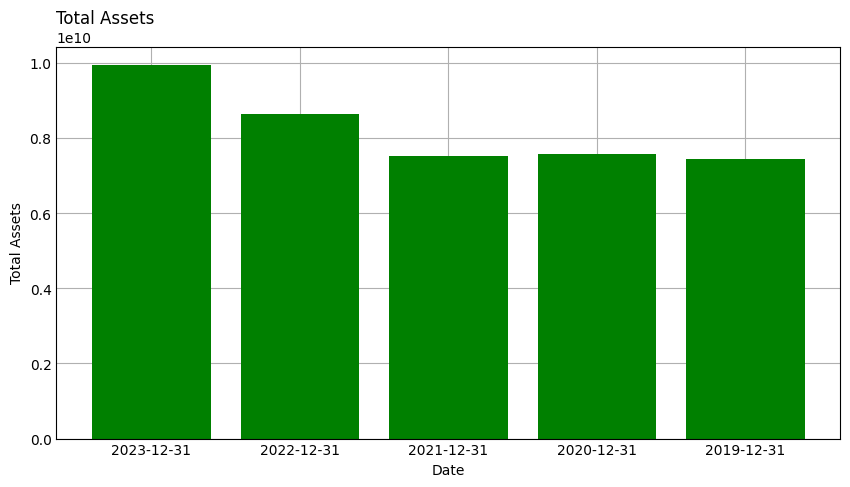

In [198]:
#total Assets 
plt.figure(figsize=(8,4))
x = df_balance_sheet['date']
y = df_balance_sheet['totalAssets']

plt.xlabel('Date')
plt.ylabel('Total Assets')
plt.title('Total Assets', loc='left')

plt.bar(x,y, color='green')
plt.show()

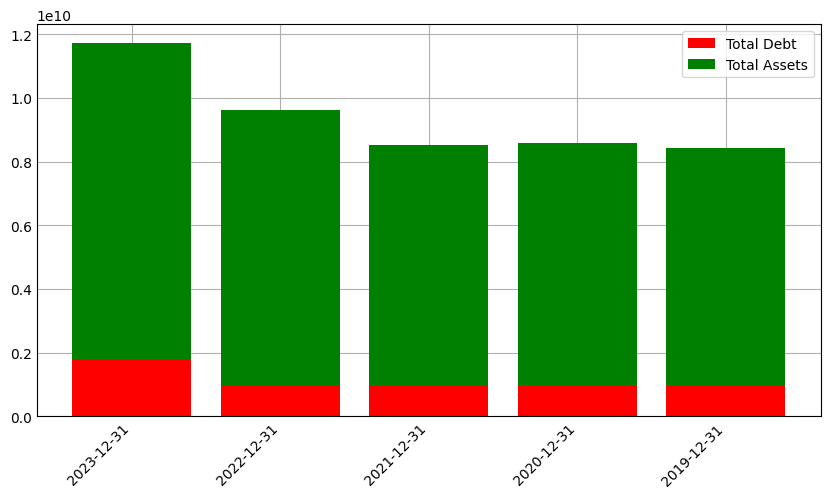

In [197]:
plt.figure(figsize=(8,4))
plt.bar(df_balance_sheet['date'], df_balance_sheet['totalDebt'], label='Total Debt', color='red')
plt.bar(df_balance_sheet['date'], df_balance_sheet['totalAssets'], bottom=df_balance_sheet['totalDebt'], label='Total Assets', color='green')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [177]:
#Change in inventory 
for index, row in df_balance_sheet.iterrows():
    inventory = row['inventory']
    date = row['date']
    print(date, inventory)

print()    
PC2019_2020 = (df_balance_sheet['inventory'][3] - df_balance_sheet['inventory'][4])/df_balance_sheet['inventory'][3] * 100
print(f'Inventory Change Percentage from 2019-2020:{PC2019_2020:.2f}%')

PC2020_2021 = (df_balance_sheet['inventory'][2] - df_balance_sheet['inventory'][3])/df_balance_sheet['inventory'][2]*100
print(f'Inventory Change Percentage from 2020-2021:{PC2020_2021:.2f}%')

PC2021_2022 =  (df_balance_sheet['inventory'][1] - df_balance_sheet['inventory'][2])/df_balance_sheet['inventory'][1]*100
print(f'Inventory Change Percentage from 2021-2022:{PC2021_2022:.2f}%')

PC2022_2023 =  (df_balance_sheet['inventory'][0] - df_balance_sheet['inventory'][1])/df_balance_sheet['inventory'][0]*100
print(f'Inventory Change Percentage from 2022-2023:{PC2022_2023:.2f}%')

2023-09-30 6331000000
2022-09-24 4946000000
2021-09-25 6580000000
2020-09-26 4061000000
2019-09-28 4106000000

Inventory Change Percentage from 2019-2020:-1.11%
Inventory Change Percentage from 2020-2021:38.28%
Inventory Change Percentage from 2021-2022:-33.04%
Inventory Change Percentage from 2022-2023:21.88%


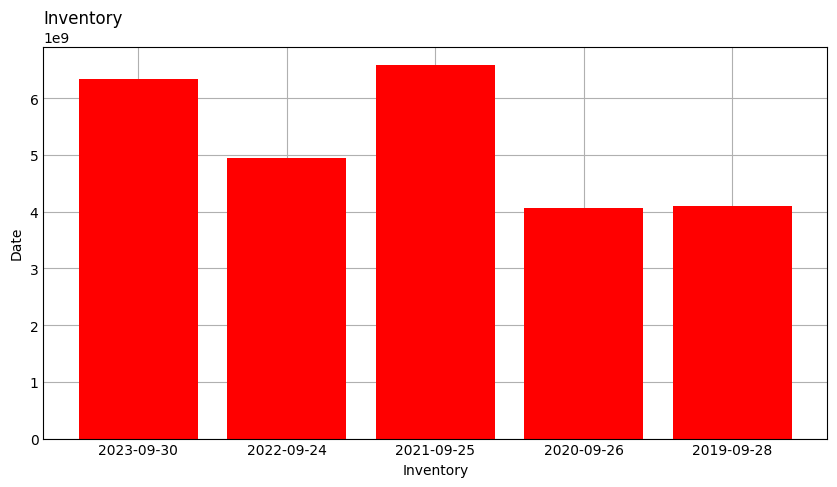

In [178]:
plt.figure(figsize=(8,4))
y = df_balance_sheet['inventory']
x = df_balance_sheet['date']

plt.xlabel('Inventory')
plt.ylabel('Date')
plt.title('Inventory', loc='left')

plt.bar(x,y, color = 'red')
plt.show()

## Debt to Equity ratio
- This is a measurement of the percentage of the company’s balance sheet that is financed by suppliers, lenders, creditors and obligors versus what the shareholders have committed.
- Amount of debt a company has in relation to its equity
- The Lower the ratio, the less the debt compared to equity
- Whether or not a debt ratio is "good" depends on the context: the company's industrial sector, the current interest rate, and so on.

In [8]:
for index, row in df_balance_sheet.iterrows():
    total_debt = row['totalDebt']
    total_equity = row['totalEquity']
    print()
    debt_to_equity = total_debt / total_equity
    if debt_to_equity <= 0.4:
        print(f'Good Debt to Equity Ratio: {debt_to_equity:.2f}')
    else:
        print(f'It is not a healthy ratio: {debt_to_equity},  ')
    print(f'Total Debt: {total_debt}, Total Equity: {total_equity}')


It is not a healthy ratio: 1.7875325845589418,  
Total Debt: 111088000000, Total Equity: 62146000000

It is not a healthy ratio: 2.3695334701610355,  
Total Debt: 120069000000, Total Equity: 50672000000

It is not a healthy ratio: 1.9768426058012363,  
Total Debt: 124719000000, Total Equity: 63090000000

It is not a healthy ratio: 1.720809929750991,  
Total Debt: 112436000000, Total Equity: 65339000000

It is not a healthy ratio: 1.1940478295464592,  
Total Debt: 108047000000, Total Equity: 90488000000


## Equity Multiplier
- Measures the proportion of a company's assets that ate financed trough debt versus equity
- A high equity multiplier mean that the company is relying more on debt to finance its assets rather than equity
- A lower equity multiplier suggests that a company's financial leverage is lower. In general, a low equity multiplier indicates that a corporation is not assuming excessive debt to finance its assets.

In [9]:
for index, row in df_balance_sheet.iterrows():
    total_assets = row['totalAssets']
    total_equity = row['totalEquity']
    print()
    equity_multiplier = total_assets / total_equity
    print(f'Total Assets: {total_assets}, Total Equity: {total_equity}')
    print(f'Total assets are approximately {equity_multiplier:.2f} times its total equity.')



Total Assets: 352583000000, Total Equity: 62146000000
Total assets are approximately 5.67 times its total equity.

Total Assets: 352755000000, Total Equity: 50672000000
Total assets are approximately 6.96 times its total equity.

Total Assets: 351002000000, Total Equity: 63090000000
Total assets are approximately 5.56 times its total equity.

Total Assets: 323888000000, Total Equity: 65339000000
Total assets are approximately 4.96 times its total equity.

Total Assets: 338516000000, Total Equity: 90488000000
Total assets are approximately 3.74 times its total equity.


## Quick Ratio

-Assesses a company's short-term liquidity and ability to meet its immediate obligations


In [10]:
for index, row in df_balance_sheet.iterrows():
    current_assets = row['totalCurrentAssets']
    inventory = row['inventory']
    current_liabilities = row['totalCurrentLiabilities']
    print()
    quick_ratio = (current_assets - inventory) / current_liabilities
    print(f'Total Current Assets: {current_assets}, Total Current Liabilities: {current_liabilities}, Inventory: {inventory}')
    print(f'Quick Ratio:{quick_ratio:.2f}')
    if quick_ratio > 1:
        print(f'The company has sufficient liquidity to cover current liabilities')
    else:
       print('Might have liquidity Problems')


Total Current Assets: 143566000000, Total Current Liabilities: 145308000000, Inventory: 6331000000
Quick Ratio:0.94
Might have liquidity Problems

Total Current Assets: 135405000000, Total Current Liabilities: 153982000000, Inventory: 4946000000
Quick Ratio:0.85
Might have liquidity Problems

Total Current Assets: 134836000000, Total Current Liabilities: 125481000000, Inventory: 6580000000
Quick Ratio:1.02
The company has sufficient liquidity to cover current liabilities

Total Current Assets: 143713000000, Total Current Liabilities: 105392000000, Inventory: 4061000000
Quick Ratio:1.33
The company has sufficient liquidity to cover current liabilities

Total Current Assets: 162819000000, Total Current Liabilities: 105718000000, Inventory: 4106000000
Quick Ratio:1.50
The company has sufficient liquidity to cover current liabilities


## Current Ratio

- The current ratio is a liquidity ratio that measures a company’s ability to pay short-term obligations
- A current ratio of 1.0 or greater is an indicator that the company is well-positioned to cover its current or short-term Liabilities

In [11]:
for index, row, in df_balance_sheet.iterrows():
    current_assets = row['totalCurrentAssets']
    current_liabilities = row['totalCurrentLiabilities']
    date = row['date']
    print()
    current_ratio = current_assets / current_liabilities
    print(date)
    print(f'Total Current Assets: {current_assets}, Total Current Liabilities: {current_liabilities}')
    print(f'Current Ratio: {current_ratio:.2f}')



2023-09-30
Total Current Assets: 143566000000, Total Current Liabilities: 145308000000
Current Ratio: 0.99

2022-09-24
Total Current Assets: 135405000000, Total Current Liabilities: 153982000000
Current Ratio: 0.88

2021-09-25
Total Current Assets: 134836000000, Total Current Liabilities: 125481000000
Current Ratio: 1.07

2020-09-26
Total Current Assets: 143713000000, Total Current Liabilities: 105392000000
Current Ratio: 1.36

2019-09-28
Total Current Assets: 162819000000, Total Current Liabilities: 105718000000
Current Ratio: 1.54


## Net Working Capital

In [12]:
# current assets - current Liabilities / total Assets
for index, row, in df_balance_sheet.iterrows():
    current_assets = row['totalCurrentAssets']
    current_liabilities = row['totalCurrentLiabilities']
    total_assets = row['totalAssets']
    print()
    NWC = (current_assets - current_liabilities) / total_assets
    print(f'Total Current Assets: {current_assets}, Total Current Liabilities: {current_liabilities}, Total Assets: {total_assets}')
    print(f'Net Working Capital {NWC: .2f}')


Total Current Assets: 143566000000, Total Current Liabilities: 145308000000, Total Assets: 352583000000
Net Working Capital -0.00

Total Current Assets: 135405000000, Total Current Liabilities: 153982000000, Total Assets: 352755000000
Net Working Capital -0.05

Total Current Assets: 134836000000, Total Current Liabilities: 125481000000, Total Assets: 351002000000
Net Working Capital  0.03

Total Current Assets: 143713000000, Total Current Liabilities: 105392000000, Total Assets: 323888000000
Net Working Capital  0.12

Total Current Assets: 162819000000, Total Current Liabilities: 105718000000, Total Assets: 338516000000
Net Working Capital  0.17


## Total Debt - to - Capitalization Ratio
* The total amount of debt in relation to company's total capitalization
* The lower ratio the less your business is capitalized using debt

In [13]:
def tdebt_to_cap(total_debt, shareholders_equity):
    return total_debt / (total_debt + shareholders_equity)

for index, row in df_balance_sheet.iterrows():
    total_debt = row['totalDebt']
    shareholders_equity = row['totalStockholdersEquity']

    result = tdebt_to_cap(total_debt, shareholders_equity)
    print(f'Total Debt to Capitalization ratio: {result}')

Total Debt to Capitalization ratio: 0.6412597988847455
Total Debt to Capitalization ratio: 0.7032230102904399
Total Debt to Capitalization ratio: 0.6640736066961648
Total Debt to Capitalization ratio: 0.6324623822247223
Total Debt to Capitalization ratio: 0.5442214219155312


## Cash Flow Projection

* Opening Balance -> Starting cash balance for the projection period
* Revenue
* Investments

In [14]:
df_balance_sheet['date'] = pd.to_datetime(df_balance_sheet['date'])
df_balance_sheet = df_balance_sheet.sort_values(by = 'date')

df_balance_sheet['year'] = df_balance_sheet['date'].dt.year

years = df_balance_sheet['year'].values.reshape(-1,1)
cash_and_cash_equivalents = df_balance_sheet['cashAndCashEquivalents'].values

CACE_model = LinearRegression().fit(years, cash_and_cash_equivalents)


future_years = np.array([2023, 2024, 2025]).reshape(-1,1)
predicted_CACE = CACE_model.predict(future_years)

for year, caec in zip(future_years, predicted_CACE):
     print(f"Year: {year[0]}")
     print(f'Predicted Cash and Equivalents: {caec:.2f}')
     print("-----")

Year: 2023
Predicted Cash and Equivalents: 24656600000.00
-----
Year: 2024
Predicted Cash and Equivalents: 19443800000.00
-----
Year: 2025
Predicted Cash and Equivalents: 14231000000.00
-----


In [15]:
#For DCF
total_debt = df_balance_sheet['totalDebt'][0]


print(total_debt)


111088000000


In [16]:
cash = df_balance_sheet['cashAndCashEquivalents'][0]

print(cash)

29965000000


In [17]:
print(total_equity)

90488000000
